In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# Load the dataset
df = pd.read_csv('economic data.csv')

In [4]:
df.head()

country        date  manufacturing pmi  services pmi  \
0  australia  2020-01-01               49.6          50.6   
1  australia  2020-02-01               50.2          49.0   
2  australia  2020-03-01               49.7          38.5   
3  australia  2020-04-01               44.1          19.5   
4  australia  2020-05-01               44.0          26.9   

   consumer confidence interest rates cpi yoy core cpi unemployment rate  \
0                 93.4          0.75%   2.20%    1.70%             5.20%   
1                 95.5          0.75%   2.20%    1.70%             5.10%   
2                 91.9          0.50%   2.20%    1.70%             5.20%   
3                 75.6          0.25%  -0.30%    1.20%             6.30%   
4                 88.1          0.25%  -0.30%    1.20%             7.00%   

  gdp yoy  ticker    open    high     low   close  
0   1.20%  audusd  0.7021  0.7031  0.6682  0.6691  
1   1.20%  audusd  0.6690  0.6776  0.6434  0.6509  
2   1.20%  audusd  0.6488  0.6686  0.5507  0.6135  
3  -6.10%  audusd  0.6133  0.6571  0.5979  0.6510  
4  -6.10%  audusd  0.6511  0.6684  0.6371  0.6666

In [5]:
null_counts_per_column = df.isnull().sum()

print("Count of null values per column:")
print(null_counts_per_column)

Count of null values per column:
country                0
date                   0
manufacturing pmi      0
services pmi           0
consumer confidence    0
interest rates         0
cpi yoy                0
core cpi               0
unemployment rate      0
gdp yoy                0
ticker                 0
open                   0
high                   0
low                    0
close                  0
dtype: int64


In [6]:
column_data_types = df.dtypes

print("Data types of each column:")
print(column_data_types)

Data types of each column:
country                 object
date                    object
manufacturing pmi      float64
services pmi           float64
consumer confidence    float64
interest rates          object
cpi yoy                 object
core cpi                object
unemployment rate       object
gdp yoy                 object
ticker                  object
open                   float64
high                   float64
low                    float64
close                  float64
dtype: object


Data cleaning

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

percent_columns = ['interest rates', 'cpi yoy', 'core cpi', 'unemployment rate', 'gdp yoy']

for col in percent_columns:
    df[col] = df[col].str.replace('%', '').astype(float)  
    df.rename(columns={col: f"{col} (%)"}, inplace=True) 

df.drop(columns=['ticker'], inplace=True)

df['avg price'] = (df['high'] + df['low']) / 2

In [8]:
df.head()

country       date  manufacturing pmi  services pmi  consumer confidence  \
0  australia 2020-01-01               49.6          50.6                 93.4   
1  australia 2020-02-01               50.2          49.0                 95.5   
2  australia 2020-03-01               49.7          38.5                 91.9   
3  australia 2020-04-01               44.1          19.5                 75.6   
4  australia 2020-05-01               44.0          26.9                 88.1   

   interest rates (%)  cpi yoy (%)  core cpi (%)  unemployment rate (%)  \
0                0.75          2.2           1.7                    5.2   
1                0.75          2.2           1.7                    5.1   
2                0.50          2.2           1.7                    5.2   
3                0.25         -0.3           1.2                    6.3   
4                0.25         -0.3           1.2                    7.0   

   gdp yoy (%)    open    high     low   close  avg price  
0          1.2  0.7021  0.7031  0.6682  0.6691    0.68565  
1          1.2  0.6690  0.6776  0.6434  0.6509    0.66050  
2          1.2  0.6488  0.6686  0.5507  0.6135    0.60965  
3         -6.1  0.6133  0.6571  0.5979  0.6510    0.62750  
4         -6.1  0.6511  0.6684  0.6371  0.6666    0.65275

In [9]:
print("Updated data types:")
print(df.dtypes)

Updated data types:
country                          object
date                     datetime64[ns]
manufacturing pmi               float64
services pmi                    float64
consumer confidence             float64
interest rates (%)              float64
cpi yoy (%)                     float64
core cpi (%)                    float64
unemployment rate (%)           float64
gdp yoy (%)                     float64
open                            float64
high                            float64
low                             float64
close                           float64
avg price                       float64
dtype: object


Data Visualization

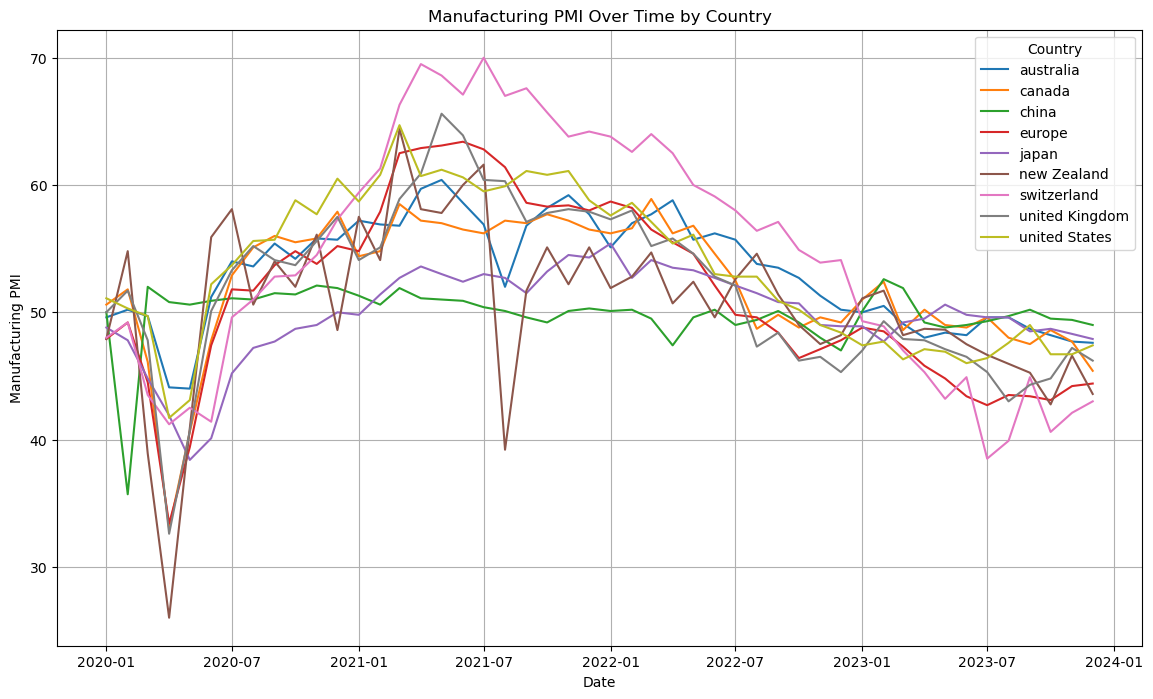

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

countries = ['australia', 'canada', 'china', 'europe', 'japan', 'new Zealand', 'switzerland', 'united Kingdom', 'united States']

plt.figure(figsize=(14, 8))

for country in countries:
    country_data = df[df['country'].str.lower() == country.lower()]
    sns.lineplot(data=country_data, x=country_data.index, y='manufacturing pmi', label=country)

plt.title('Manufacturing PMI Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Manufacturing PMI')
plt.legend(title='Country')
plt.grid(True)

plt.show()

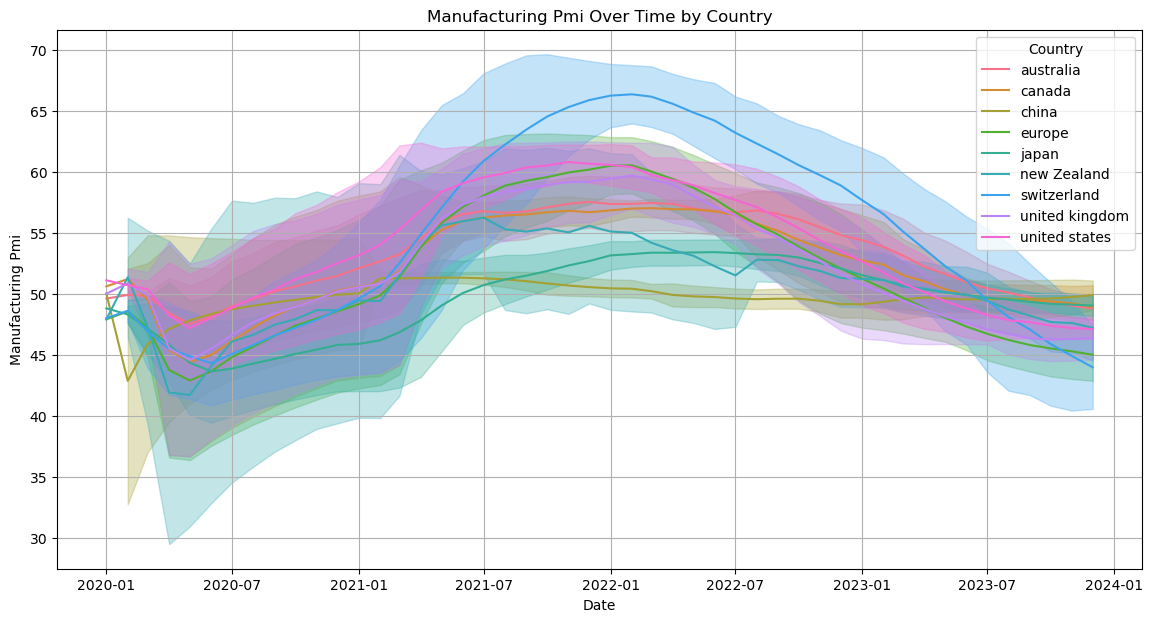

In [11]:
countries = ['australia', 'canada', 'china', 'europe', 'japan', 'new Zealand', 'switzerland', 'united kingdom', 'united states']

indicator = 'manufacturing pmi'

plt.figure(figsize=(14, 7))

colors = sns.color_palette('husl', n_colors=len(countries))

for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country.lower()]
    
    rolling_mean = country_data[indicator].rolling(window=12, min_periods=1).mean()
    rolling_std = country_data[indicator].rolling(window=12, min_periods=1).std()
    
    plt.plot(country_data.index, rolling_mean, label=country, color=colors[i])
    
    plt.fill_between(country_data.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color=colors[i], alpha=0.3)

plt.title(f'{indicator.title()} Over Time by Country')
plt.xlabel('Date')
plt.ylabel(f'{indicator.title()}')
plt.legend(title='Country')
plt.grid(True)

plt.show()

In [12]:
plt.figure(figsize=(14, 7))
colors = sns.color_palette('husl', n_colors=len(countries))
for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country]
    rolling_mean = country_data['services pmi'].rolling(window=12, min_periods=1).mean()
    rolling_std = country_data['services pmi'].rolling(window=12, min_periods=1).std()
    plt.plot(country_data.index, rolling_mean, label=country, color=colors[i])
    plt.fill_between(country_data.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color=colors[i], alpha=0.3)
plt.title('Services PMI Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Services PMI')
plt.legend(title='Country')
plt.grid(True)
plt.show()

In [13]:
plt.figure(figsize=(14, 7))
colors = sns.color_palette('husl', n_colors=len(countries))
for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country]
    rolling_mean = country_data['consumer confidence'].rolling(window=12, min_periods=1).mean()
    plt.plot(country_data.index, rolling_mean, label=country, color=colors[i])

plt.title('Consumer Confidence Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Consumer Confidence')
plt.legend(title='Country', loc='upper left')  
plt.grid(True)
plt.show()

In [14]:
plt.figure(figsize=(14, 7))
colors = sns.color_palette('husl', n_colors=len(countries))
for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country]
    rolling_mean = country_data['interest rates (%)'].rolling(window=12, min_periods=1).mean()
    plt.plot(country_data.index, rolling_mean, label=country, color=colors[i])
plt.title('Interest Rates Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Interest Rates (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

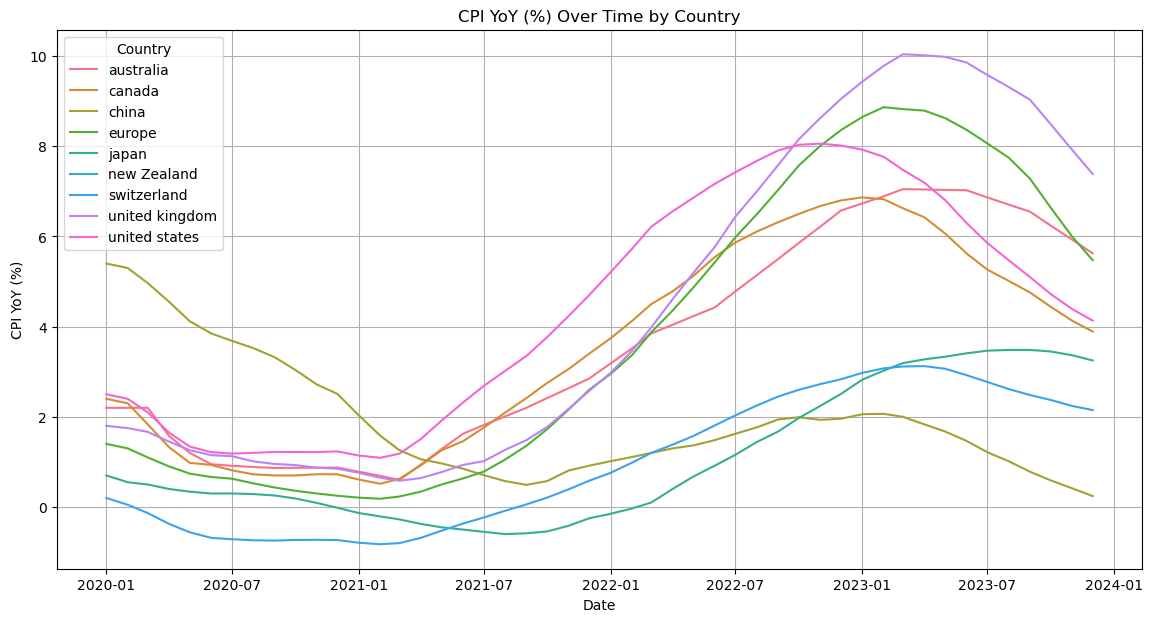

In [15]:
plt.figure(figsize=(14, 7))
colors = sns.color_palette('husl', n_colors=len(countries))
for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country]
    rolling_mean = country_data['cpi yoy (%)'].rolling(window=12, min_periods=1).mean()
    plt.plot(country_data.index, rolling_mean, label=country, color=colors[i])
plt.title('CPI YoY (%) Over Time by Country')
plt.xlabel('Date')
plt.ylabel('CPI YoY (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

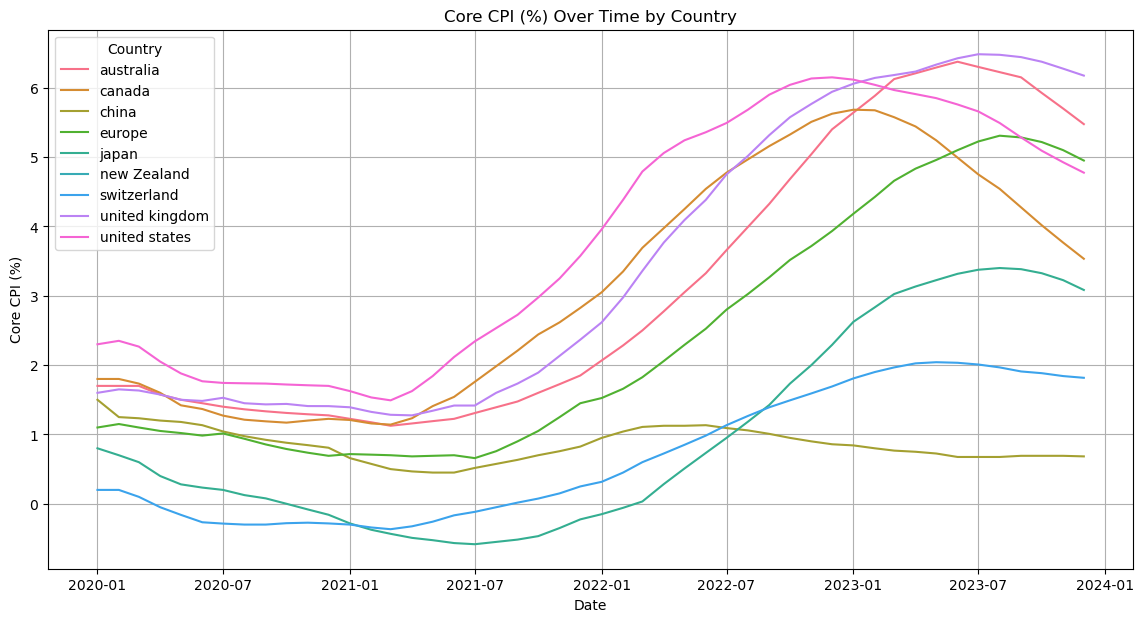

In [16]:
plt.figure(figsize=(14, 7))
colors = sns.color_palette('husl', n_colors=len(countries))
for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country]
    rolling_mean = country_data['core cpi (%)'].rolling(window=12, min_periods=1).mean()
    plt.plot(country_data.index, rolling_mean, label=country, color=colors[i])
plt.title('Core CPI (%) Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Core CPI (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

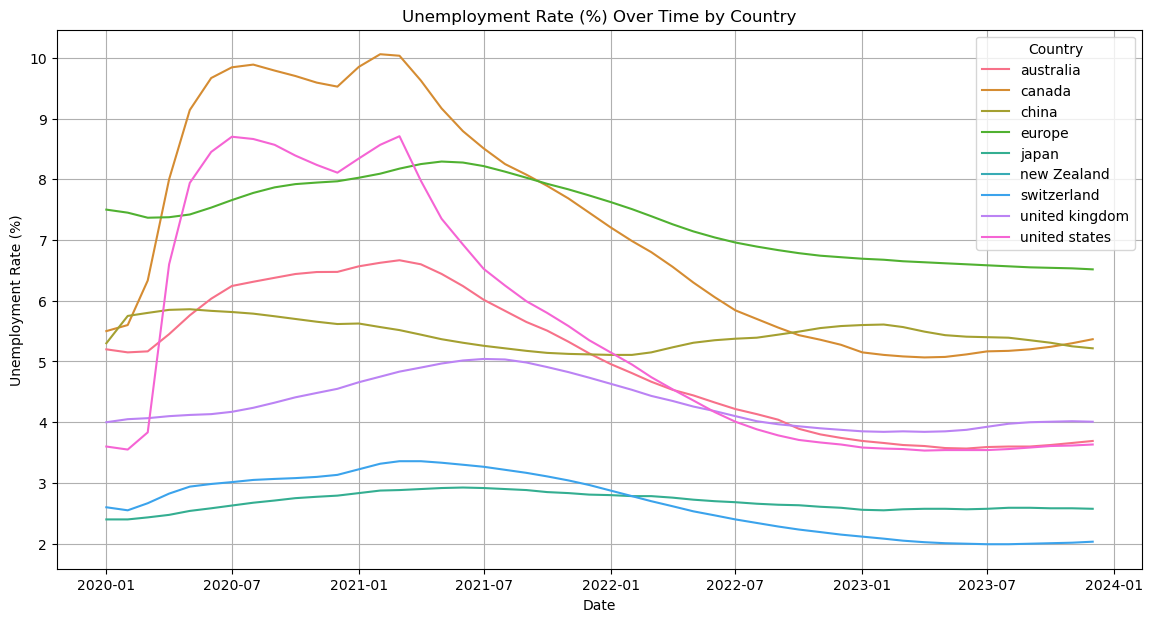

In [17]:
plt.figure(figsize=(14, 7))
colors = sns.color_palette('husl', n_colors=len(countries))
for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country]
    rolling_mean = country_data['unemployment rate (%)'].rolling(window=12, min_periods=1).mean()
    plt.plot(country_data.index, rolling_mean, label=country, color=colors[i])
plt.title('Unemployment Rate (%) Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

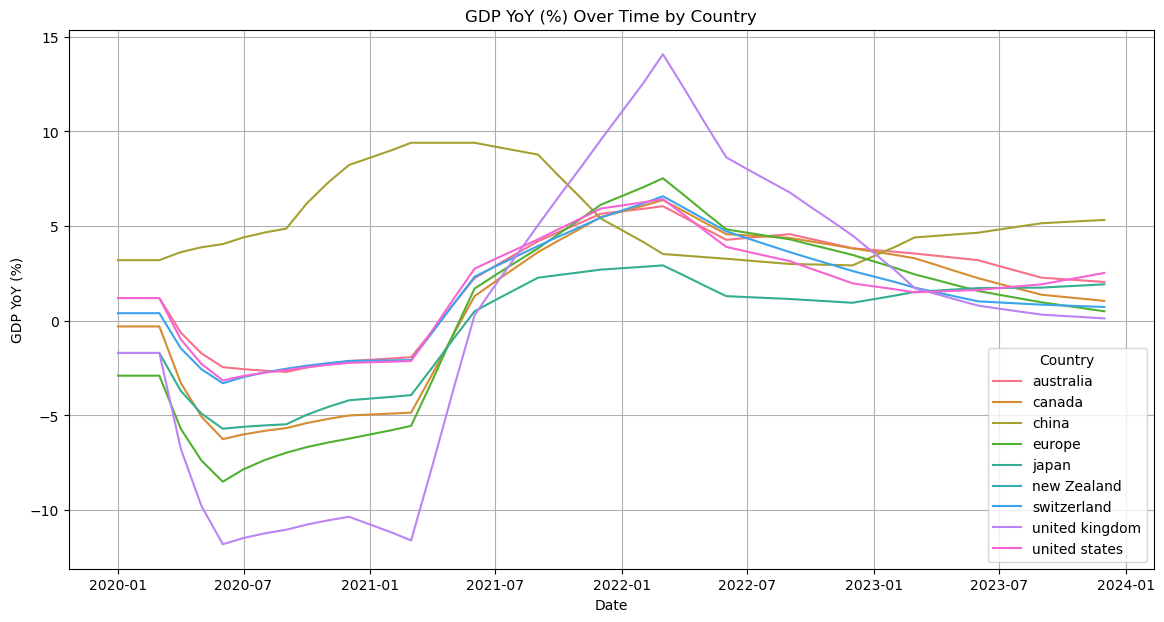

In [18]:
plt.figure(figsize=(14, 7))
colors = sns.color_palette('husl', n_colors=len(countries))
for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country]
    rolling_mean = country_data['gdp yoy (%)'].rolling(window=12, min_periods=1).mean()
    plt.plot(country_data.index, rolling_mean, label=country, color=colors[i])
plt.title('GDP YoY (%) Over Time by Country')
plt.xlabel('Date')
plt.ylabel('GDP YoY (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

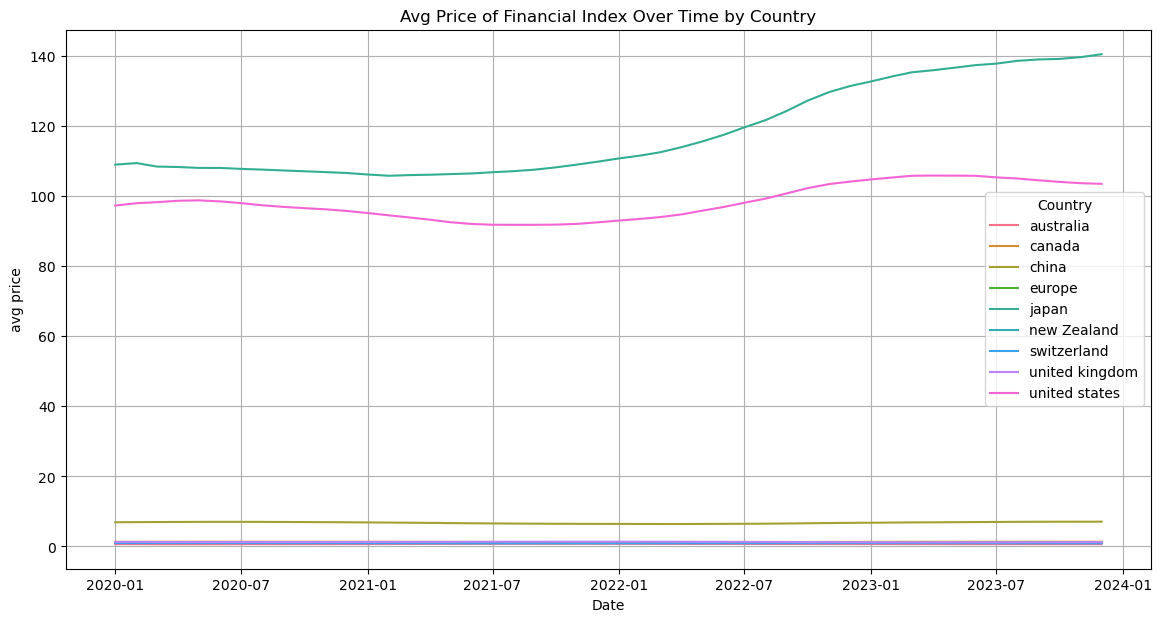

In [19]:
plt.figure(figsize=(14, 7))
colors = sns.color_palette('husl', n_colors=len(countries))
for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country]
    rolling_mean = country_data['avg price'].rolling(window=12, min_periods=1).mean()
    plt.plot(country_data.index, rolling_mean, label=country, color=colors[i])
plt.title('Avg Price of Financial Index Over Time by Country')
plt.xlabel('Date')
plt.ylabel('avg price')
plt.legend(title='Country')
plt.grid(True)
plt.show()

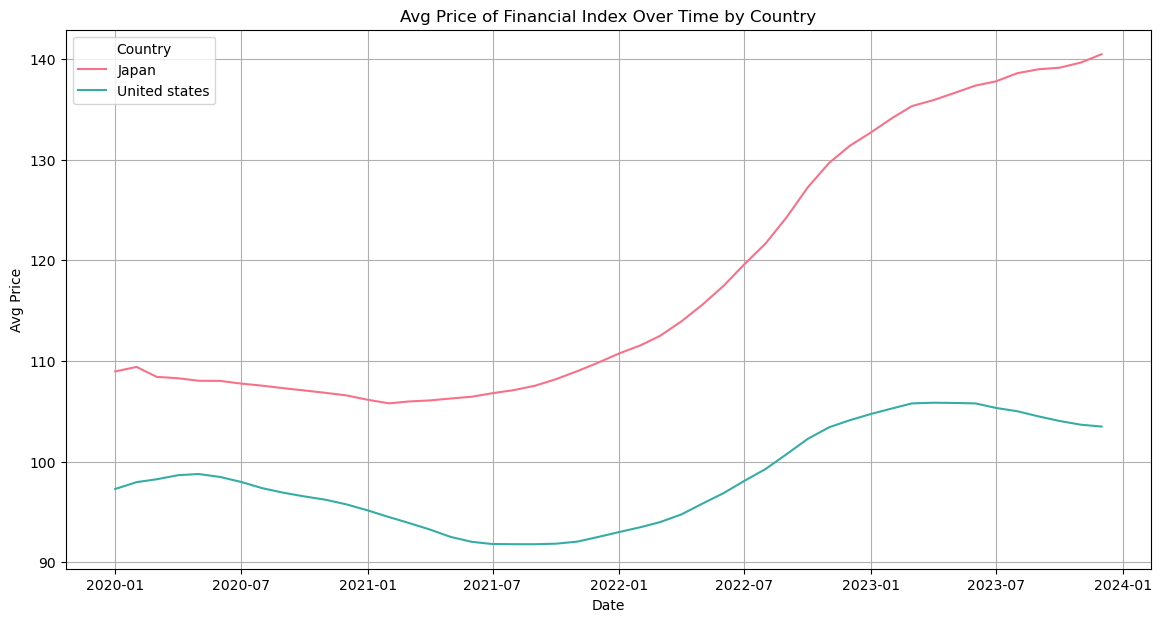

In [23]:
countries = ['japan', 'united states']

plt.figure(figsize=(14, 7))

colors = sns.color_palette('husl', n_colors=len(countries))

for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country.lower()]
    
    if not country_data.empty:
        rolling_mean = country_data['avg price'].rolling(window=12, min_periods=1).mean()
        
        plt.plot(country_data.index, rolling_mean, label=country.capitalize(), color=colors[i])

plt.title('Avg Price of Financial Index Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Avg Price')

plt.legend(title='Country')

plt.grid(True)

plt.show()

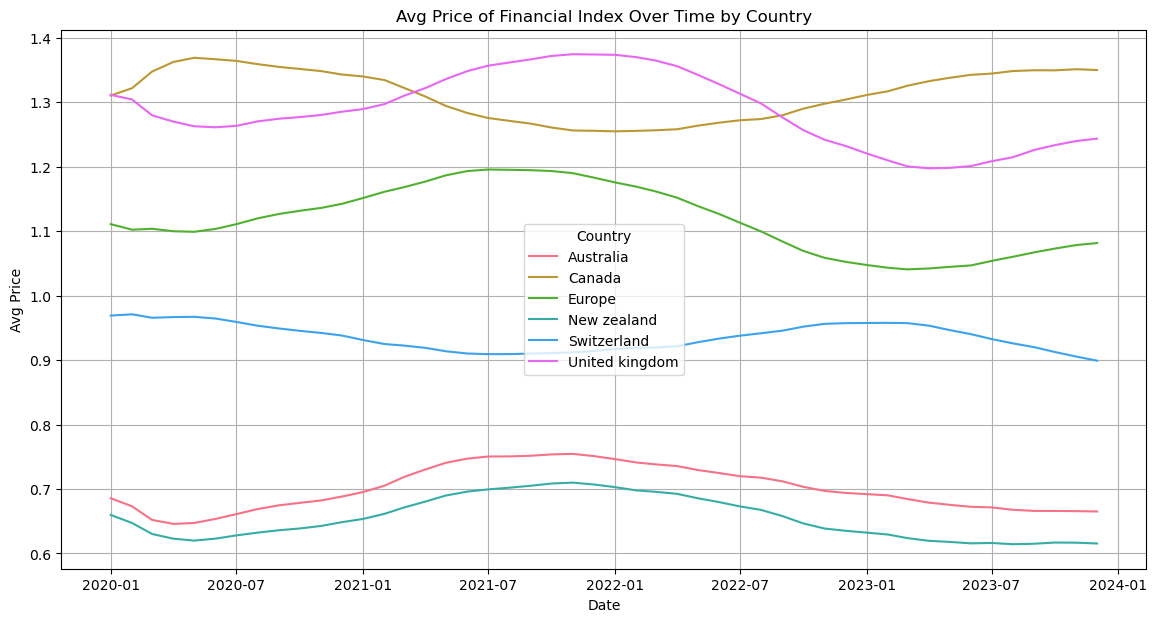

In [25]:
countries = ['australia', 'canada', 'europe', 'new Zealand', 'switzerland', 'united Kingdom']

plt.figure(figsize=(14, 7))

colors = sns.color_palette('husl', n_colors=len(countries))

for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country.lower()]
    
    if not country_data.empty:
        rolling_mean = country_data['avg price'].rolling(window=12, min_periods=1).mean()
        
        plt.plot(country_data.index, rolling_mean, label=country.capitalize(), color=colors[i])

plt.title('Avg Price of Financial Index Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Avg Price')

plt.legend(title='Country')

plt.grid(True)

plt.show()

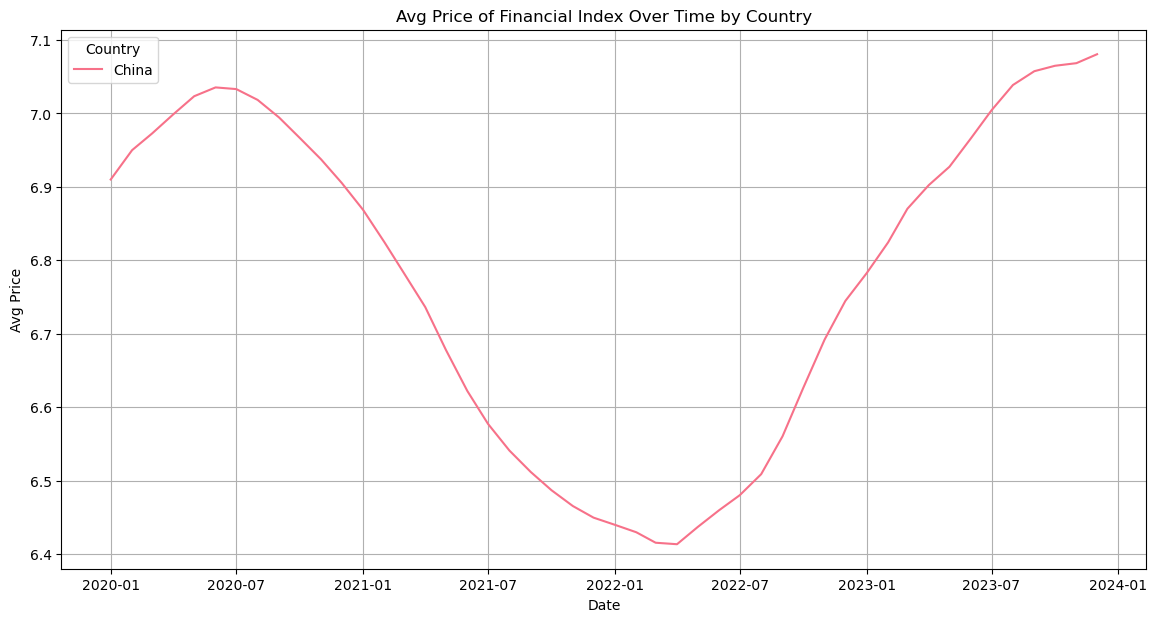

In [26]:
countries = ['china']

plt.figure(figsize=(14, 7))

colors = sns.color_palette('husl', n_colors=len(countries))

for i, country in enumerate(countries):
    country_data = df[df['country'].str.lower() == country.lower()]
    
    if not country_data.empty:
        rolling_mean = country_data['avg price'].rolling(window=12, min_periods=1).mean()
        
        plt.plot(country_data.index, rolling_mean, label=country.capitalize(), color=colors[i])

plt.title('Avg Price of Financial Index Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Avg Price')

plt.legend(title='Country')

plt.grid(True)

plt.show()

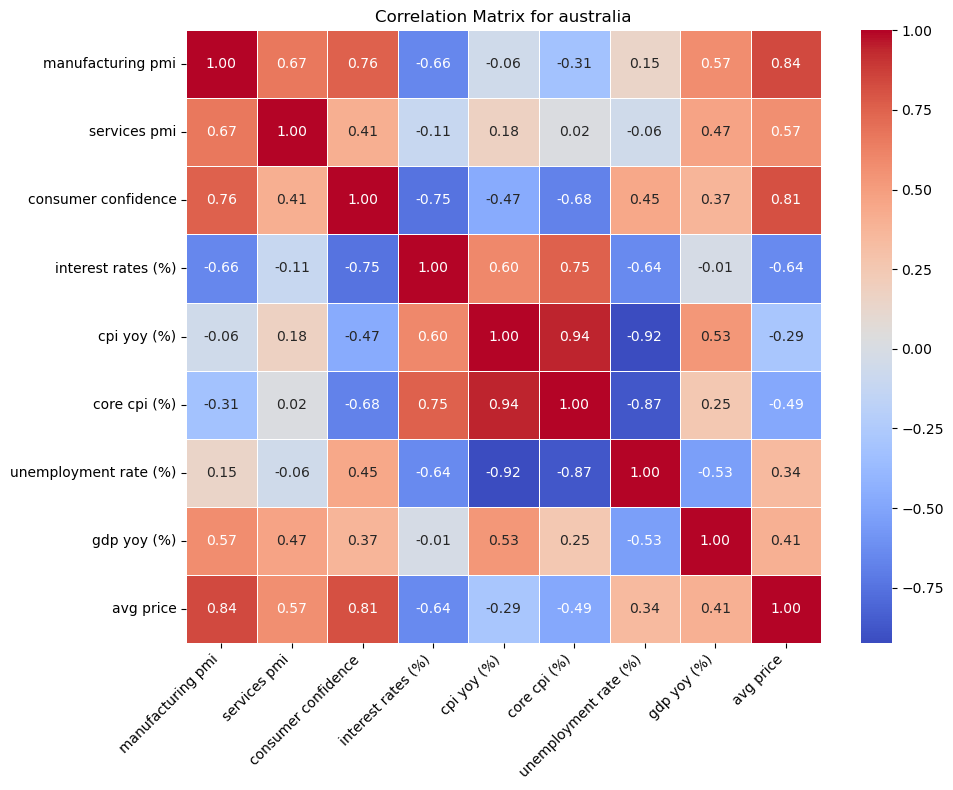

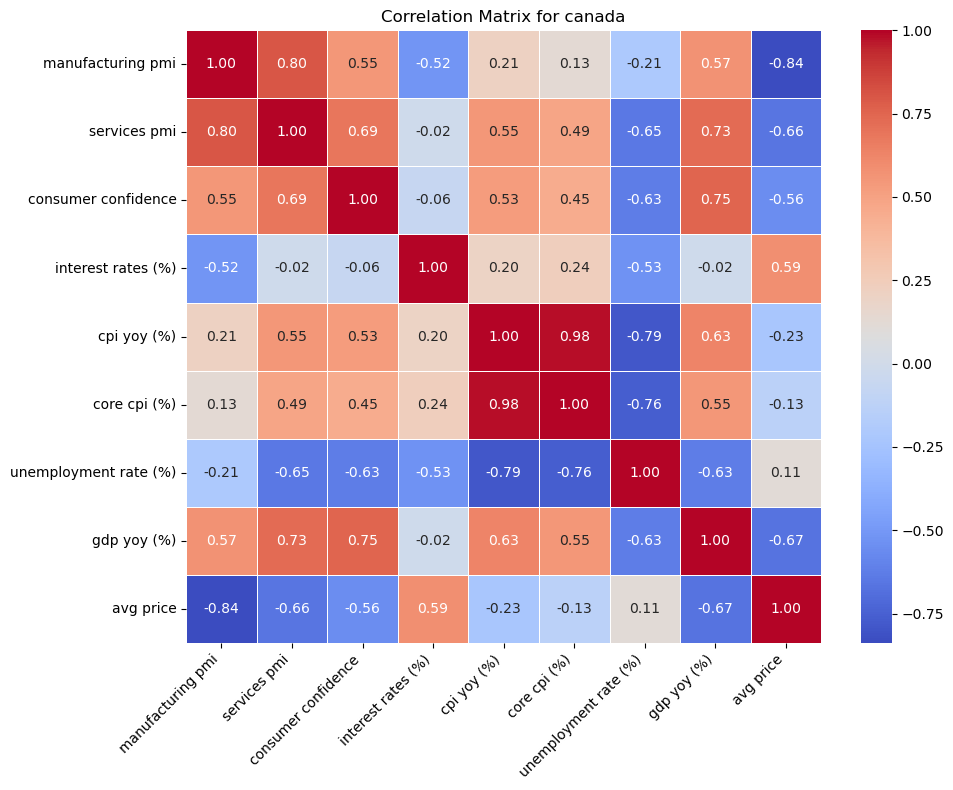

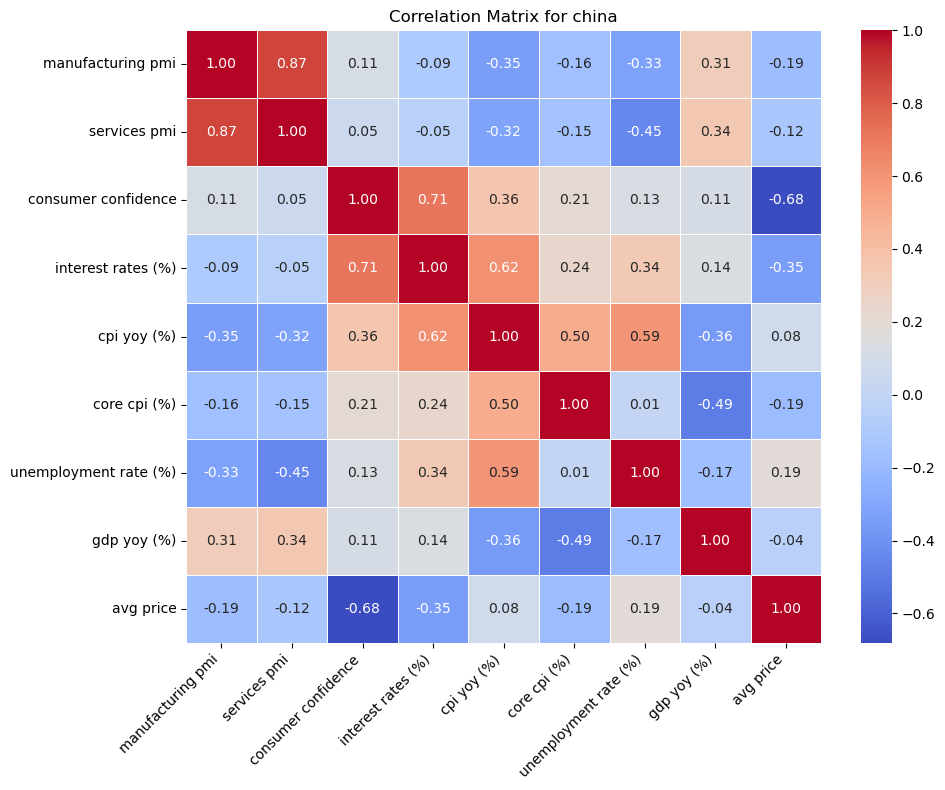

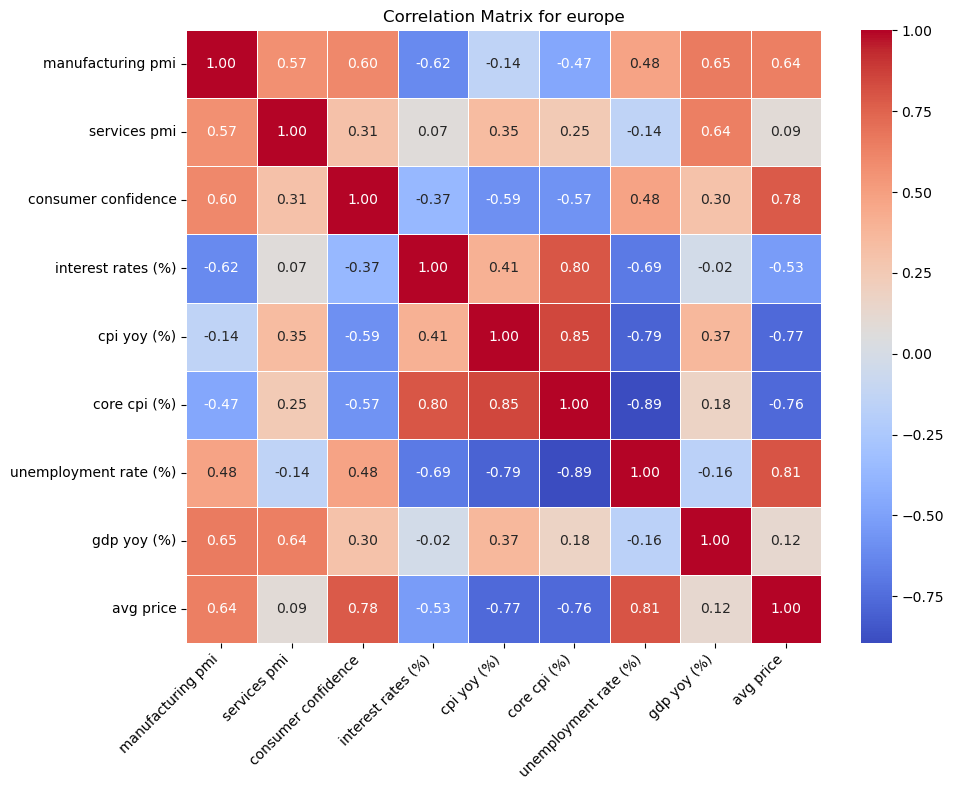

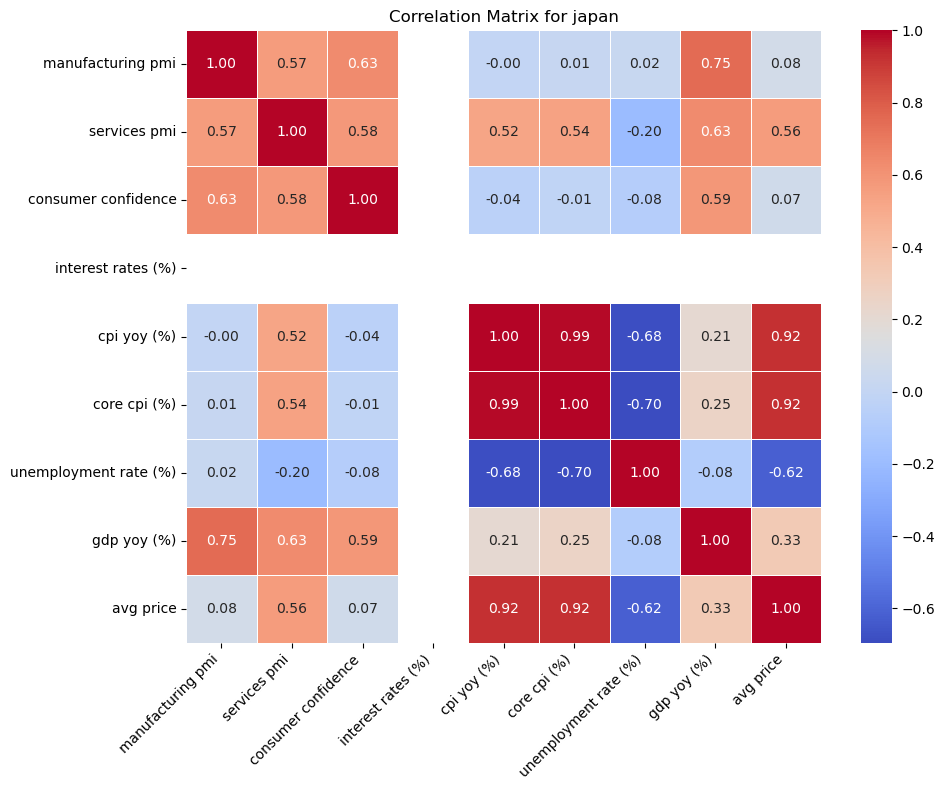

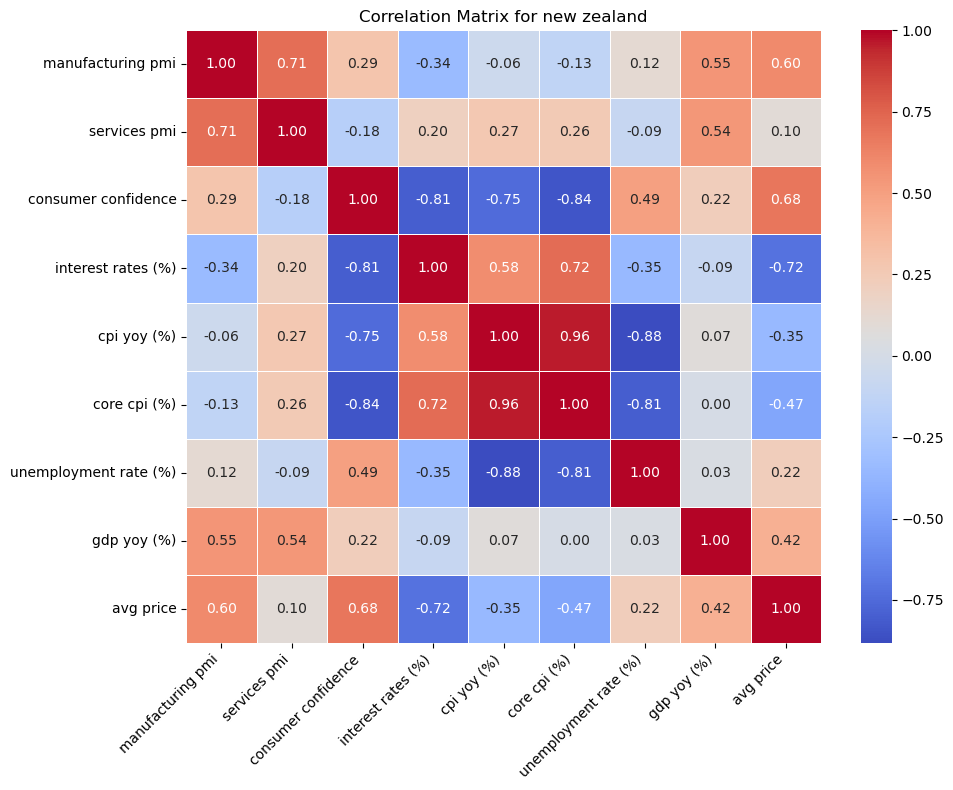

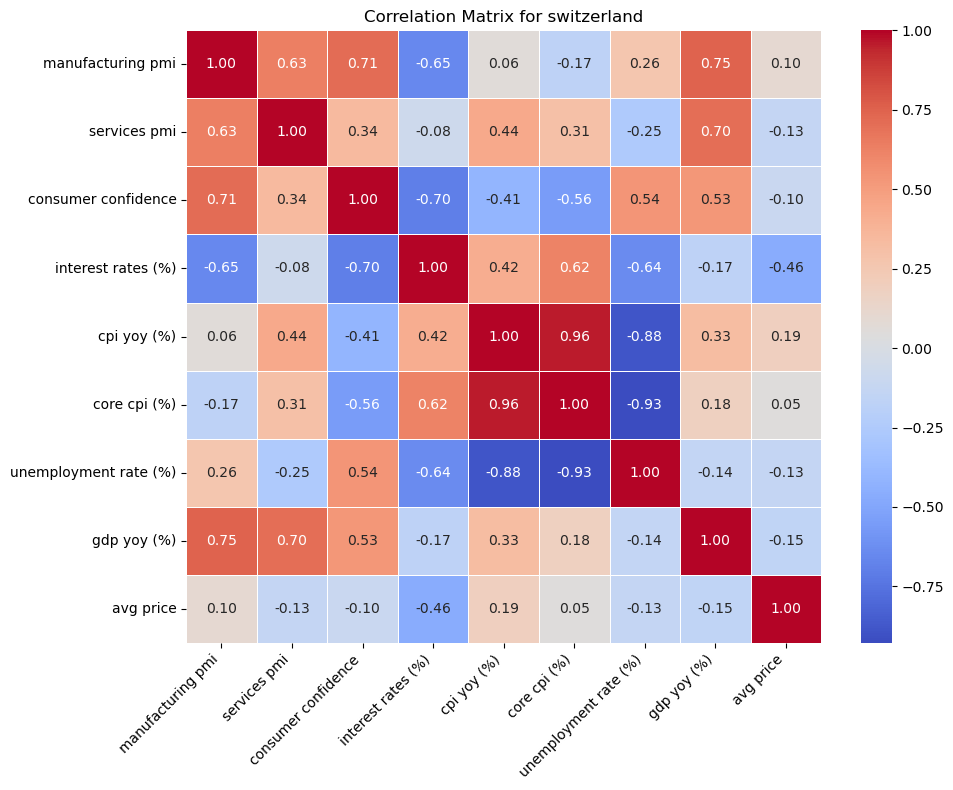

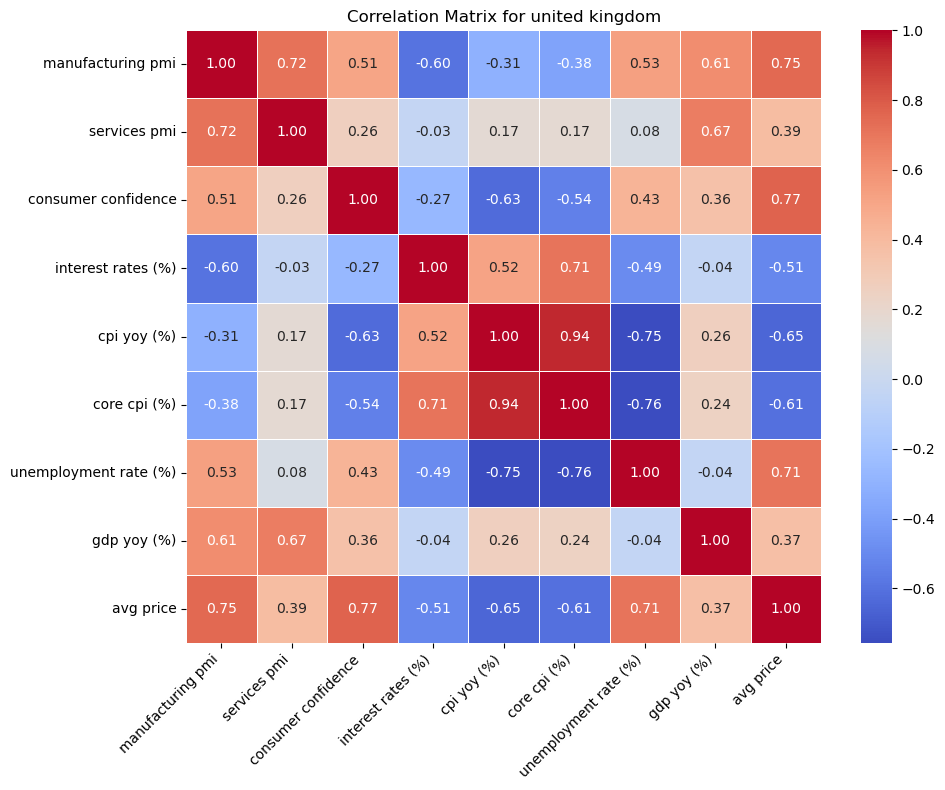

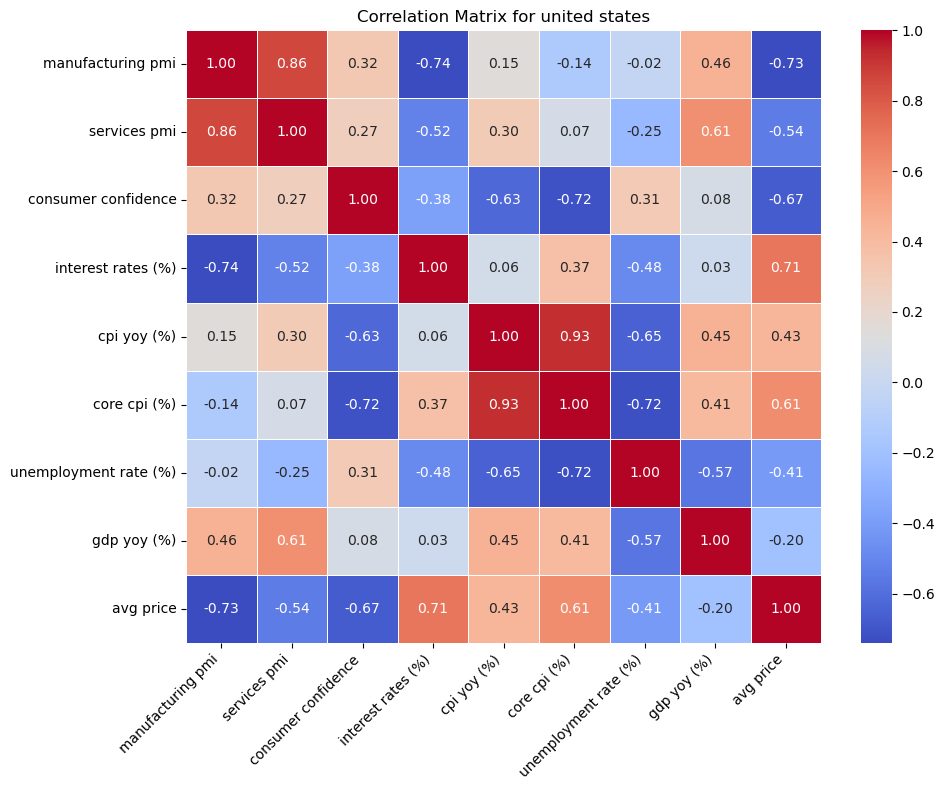

In [26]:
indicators = [
    'manufacturing pmi', 'services pmi', 'consumer confidence', 'interest rates (%)',
    'cpi yoy (%)', 'core cpi (%)', 'unemployment rate (%)', 'gdp yoy (%)', 'avg price'
]

countries = [
    'australia', 'canada', 'china', 'europe', 'japan', 'new zealand', 
    'switzerland', 'united kingdom', 'united states'
]

for country in countries:
    plt.figure(figsize=(10, 8))

    country_data = df[df['country'].str.lower() == country.lower()][indicators]
    
    corr_matrix = country_data.corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix for {country}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()  

    plt.show()

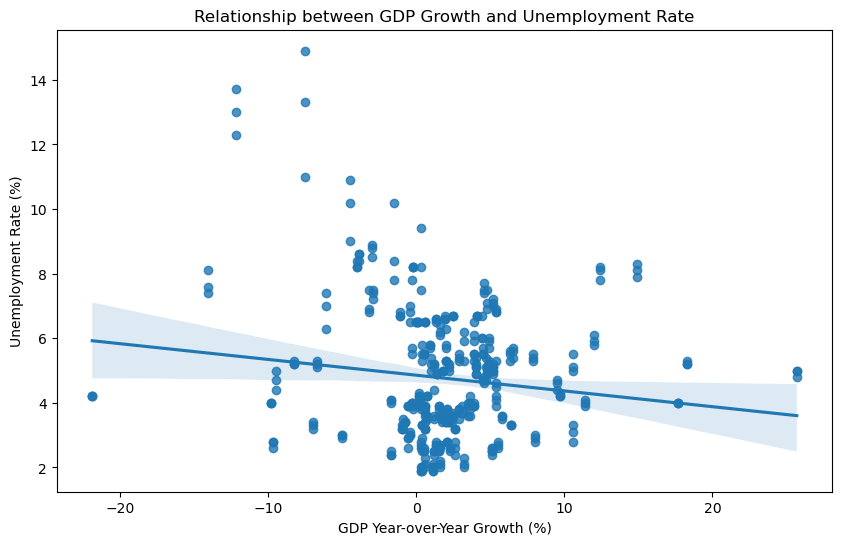

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='unemployment rate (%)', data=df)
plt.title('Relationship between GDP Growth and Unemployment Rate')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

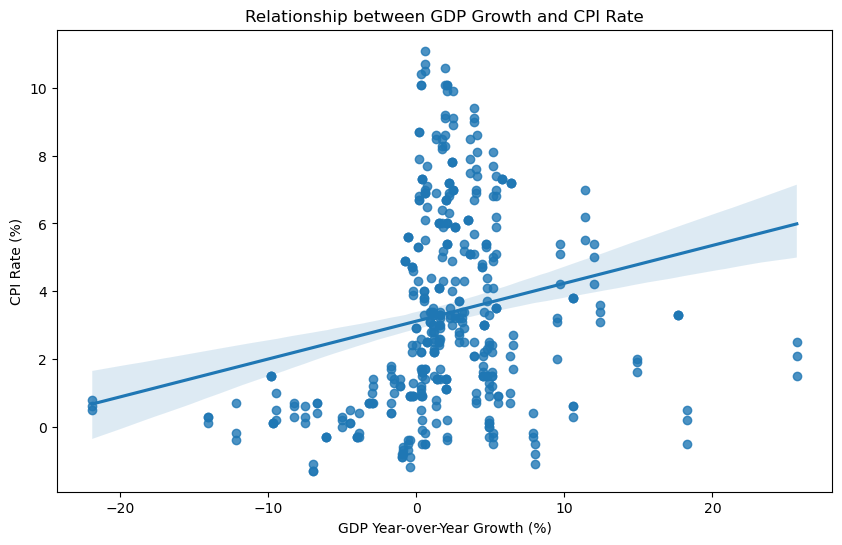

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='cpi yoy (%)', data=df)
plt.title('Relationship between GDP Growth and CPI Rate')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('CPI Rate (%)')
plt.show()

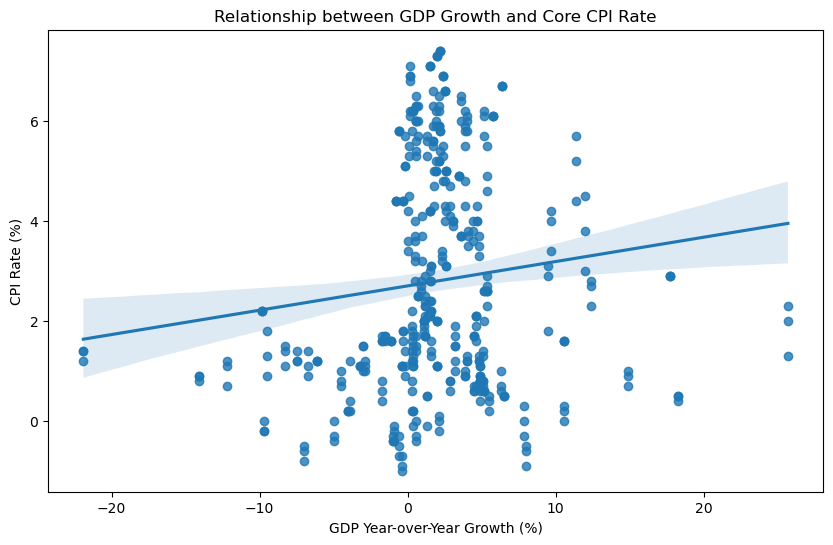

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='core cpi (%)', data=df)
plt.title('Relationship between GDP Growth and Core CPI Rate')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('CPI Rate (%)')
plt.show()

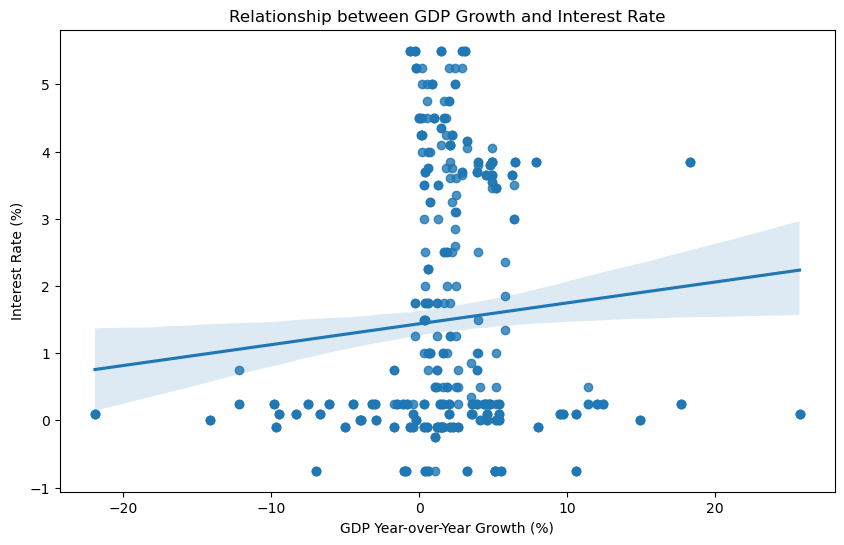

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='interest rates (%)', data=df)
plt.title('Relationship between GDP Growth and Interest Rate')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Interest Rate (%)')
plt.show()

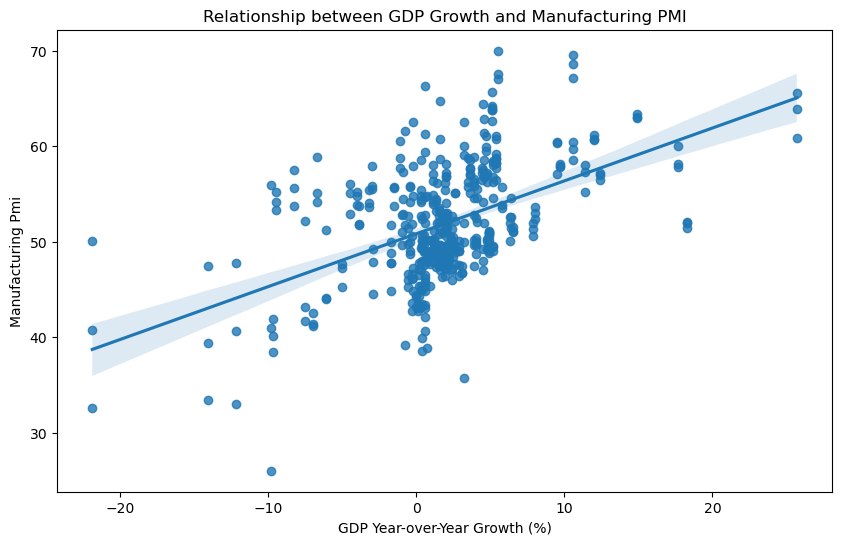

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='manufacturing pmi', data=df)
plt.title('Relationship between GDP Growth and Manufacturing PMI')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Manufacturing Pmi')
plt.show()

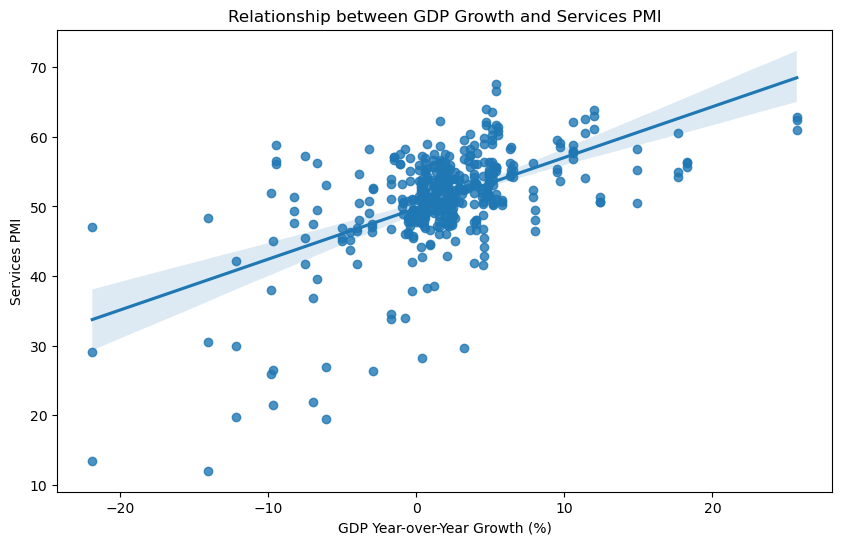

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='services pmi', data=df)
plt.title('Relationship between GDP Growth and Services PMI')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Services PMI')
plt.show()

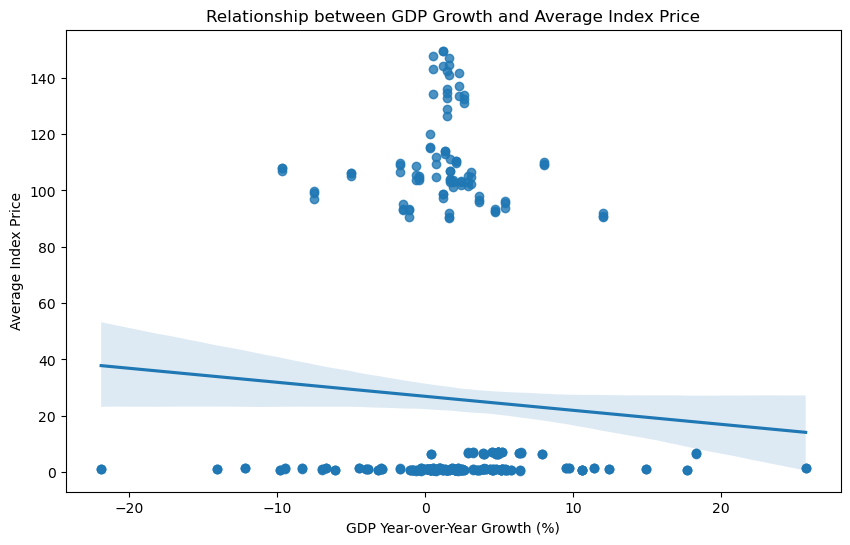

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='avg price', data=df)
plt.title('Relationship between GDP Growth and Average Index Price')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Average Index Price')
plt.show()

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['australia', 'canada', 'europe', 'new zealand', 'switzerland', 'united kingdom']

filtered_df = df[df['country'].str.lower().isin([c.lower() for c in countries])]

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='avg price', data=filtered_df)
plt.title('Relationship between GDP Growth and Average Index Price for Selected Countries')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Average Index Price')
plt.show()

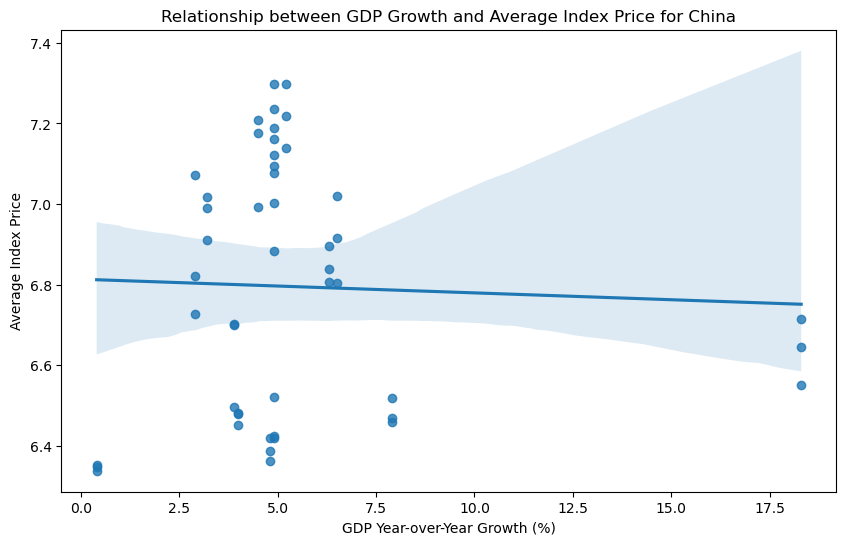

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['china']

filtered_df = df[df['country'].str.lower().isin([c.lower() for c in countries])]

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='avg price', data=filtered_df)
plt.title('Relationship between GDP Growth and Average Index Price for China')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Average Index Price')
plt.show()

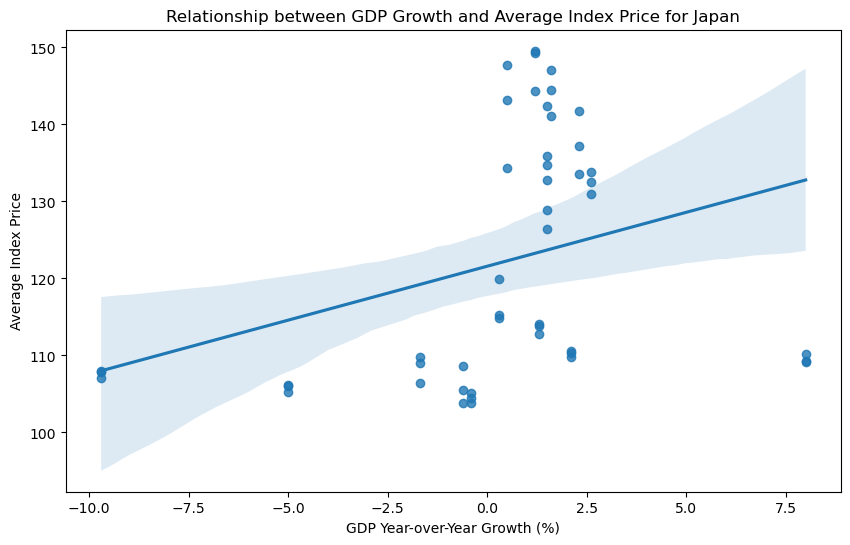

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['japan']

filtered_df = df[df['country'].str.lower().isin([c.lower() for c in countries])]

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='avg price', data=filtered_df)
plt.title('Relationship between GDP Growth and Average Index Price for Japan')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Average Index Price')
plt.show()

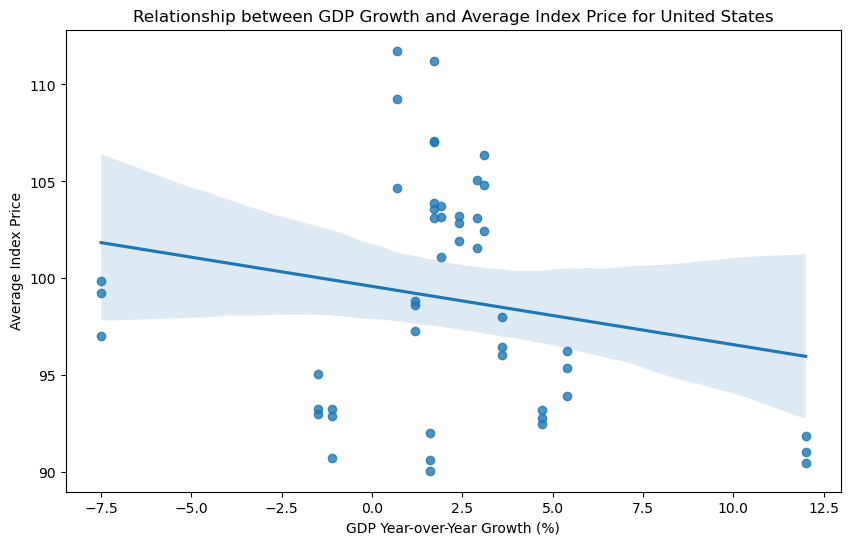

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['united states']

filtered_df = df[df['country'].str.lower().isin([c.lower() for c in countries])]

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='avg price', data=filtered_df)
plt.title('Relationship between GDP Growth and Average Index Price for United States')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Average Index Price')
plt.show()

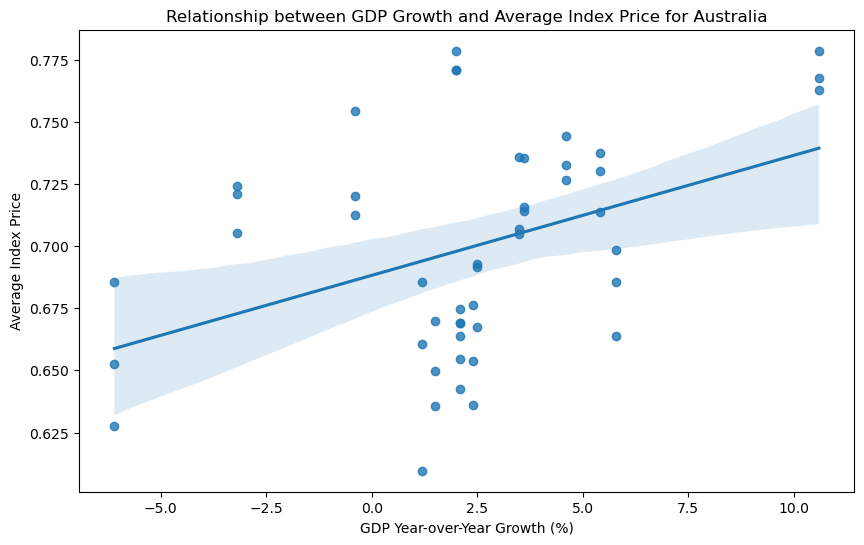

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['australia']

filtered_df = df[df['country'].str.lower().isin([c.lower() for c in countries])]

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='avg price', data=filtered_df)
plt.title('Relationship between GDP Growth and Average Index Price for Australia')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Average Index Price')
plt.show()

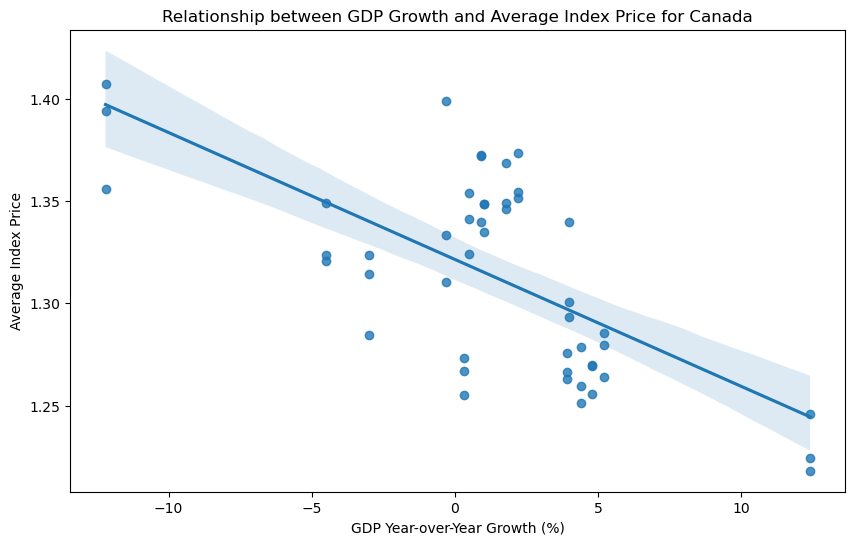

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['canada']

filtered_df = df[df['country'].str.lower().isin([c.lower() for c in countries])]

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='avg price', data=filtered_df)
plt.title('Relationship between GDP Growth and Average Index Price for Canada')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Average Index Price')
plt.show()

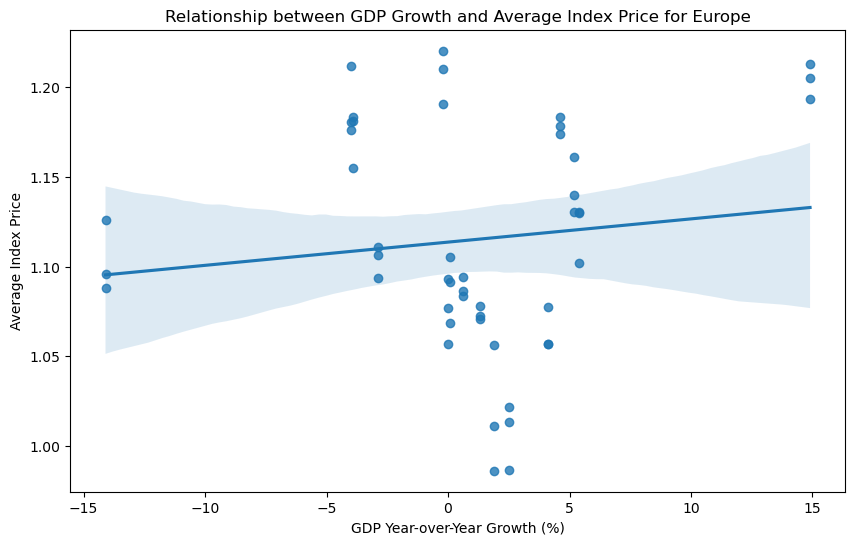

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['europe']

filtered_df = df[df['country'].str.lower().isin([c.lower() for c in countries])]

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='avg price', data=filtered_df)
plt.title('Relationship between GDP Growth and Average Index Price for Europe')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Average Index Price')
plt.show()

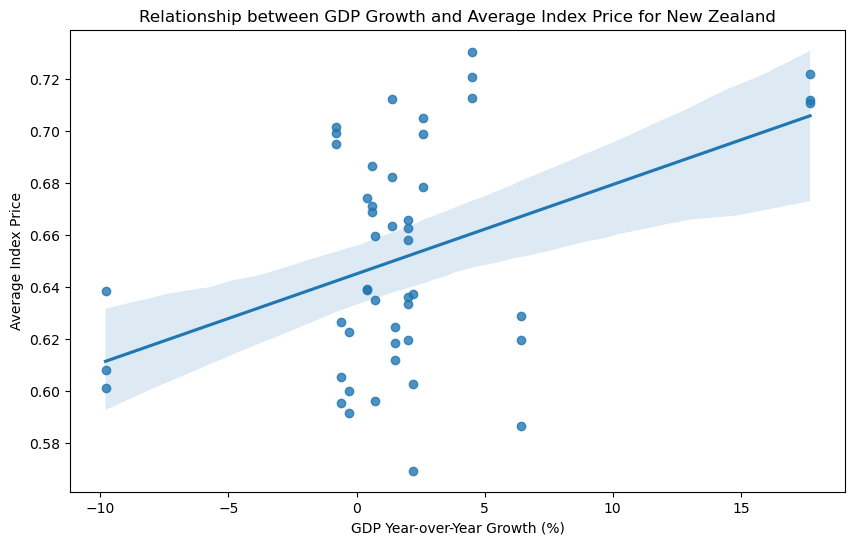

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['new zealand']

filtered_df = df[df['country'].str.lower().isin([c.lower() for c in countries])]

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='avg price', data=filtered_df)
plt.title('Relationship between GDP Growth and Average Index Price for New Zealand')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Average Index Price')
plt.show()

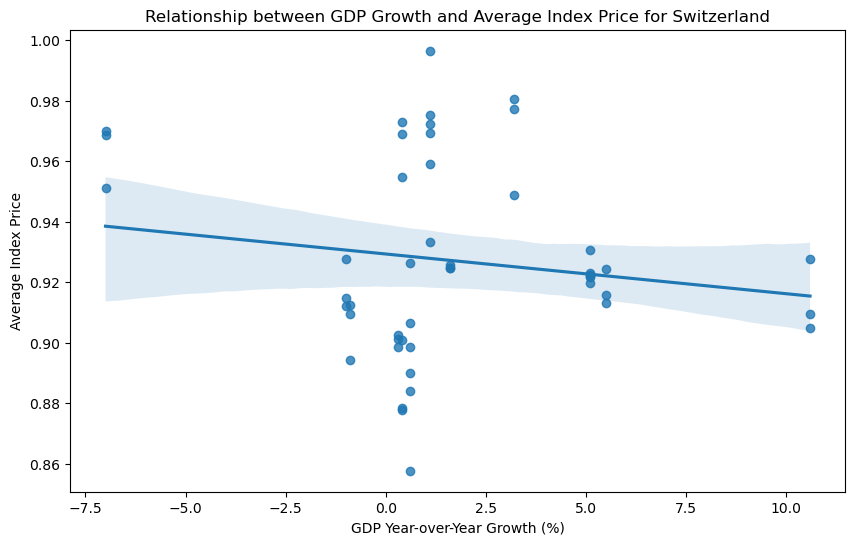

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['Switzerland']

filtered_df = df[df['country'].str.lower().isin([c.lower() for c in countries])]

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='avg price', data=filtered_df)
plt.title('Relationship between GDP Growth and Average Index Price for Switzerland')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Average Index Price')
plt.show()

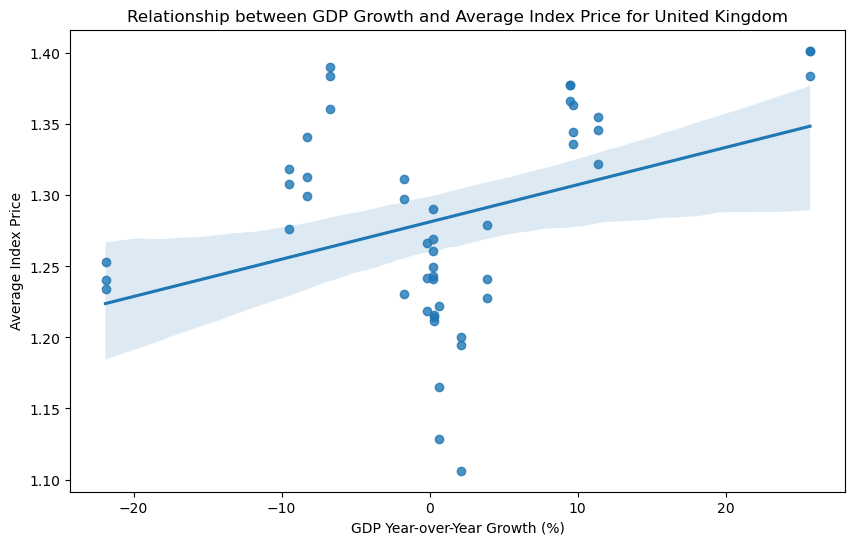

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

countries = ['united kingdom']

filtered_df = df[df['country'].str.lower().isin([c.lower() for c in countries])]

plt.figure(figsize=(10, 6))
sns.regplot(x='gdp yoy (%)', y='avg price', data=filtered_df)
plt.title('Relationship between GDP Growth and Average Index Price for United Kingdom')
plt.xlabel('GDP Year-over-Year Growth (%)')
plt.ylabel('Average Index Price')
plt.show()

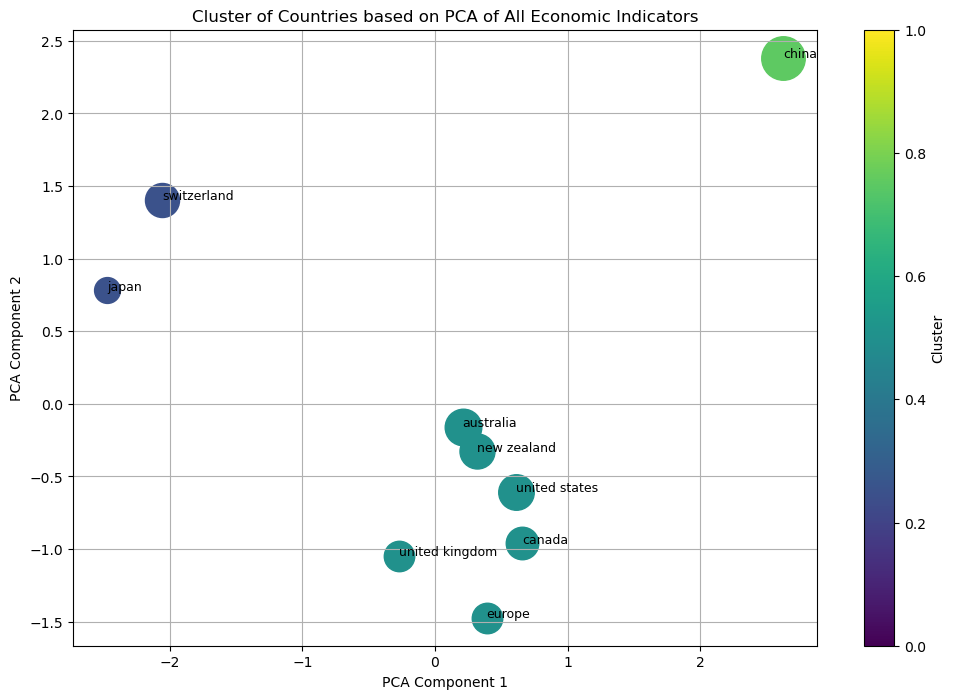

In [47]:
import numpy as np

country_data['gdp_normalized'] = np.log1p(country_data['gdp yoy (%)'] - country_data['gdp yoy (%)'].min() + 1) * 500  

min_size = 50  
country_data['gdp_normalized'] = np.maximum(country_data['gdp_normalized'], min_size)

scaler = StandardScaler()
country_scaled = scaler.fit_transform(country_data[['gdp yoy (%)', 'unemployment rate (%)', 'cpi yoy (%)', 'interest rates (%)']])

pca = PCA(n_components=2)
country_pca = pca.fit_transform(country_scaled)
kmeans = KMeans(n_clusters=3, random_state=0).fit(country_scaled)
country_data['cluster'] = kmeans.labels_

plt.figure(figsize=(12, 8))
for i, point in enumerate(country_pca):
    plt.scatter(point[0], point[1], s=country_data['gdp_normalized'].iloc[i], c=[sns.color_palette('viridis', 3)[country_data['cluster'].iloc[i]]])
    plt.text(point[0], point[1], country_data['country'].iloc[i], fontsize=9)

plt.title('Cluster of Countries based on PCA of All Economic Indicators')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

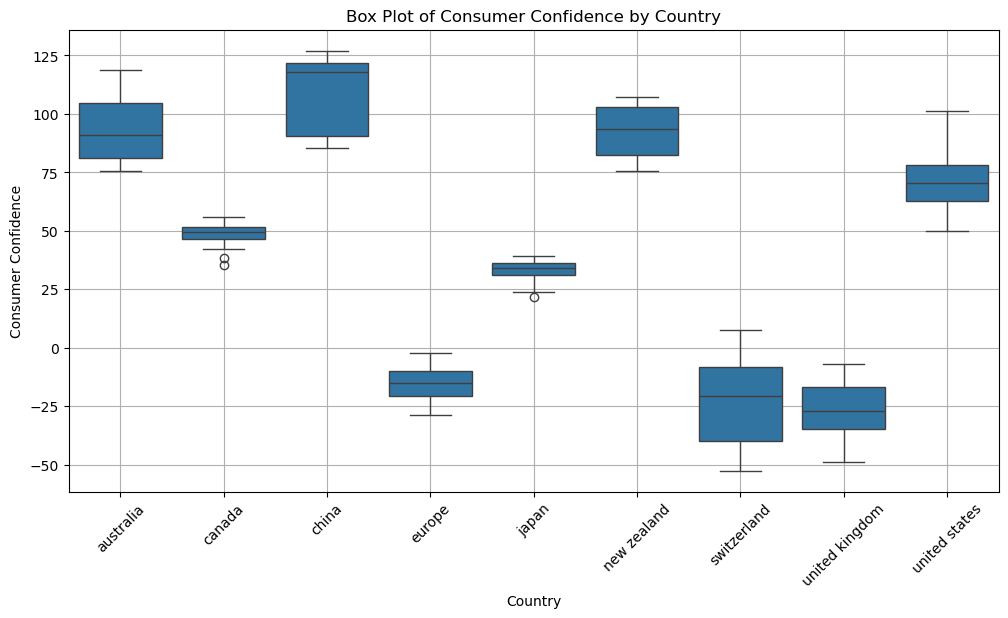

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))  
sns.boxplot(x='country', y='consumer confidence', data=df)
plt.title('Box Plot of Consumer Confidence by Country')
plt.xlabel('Country')
plt.ylabel('Consumer Confidence')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

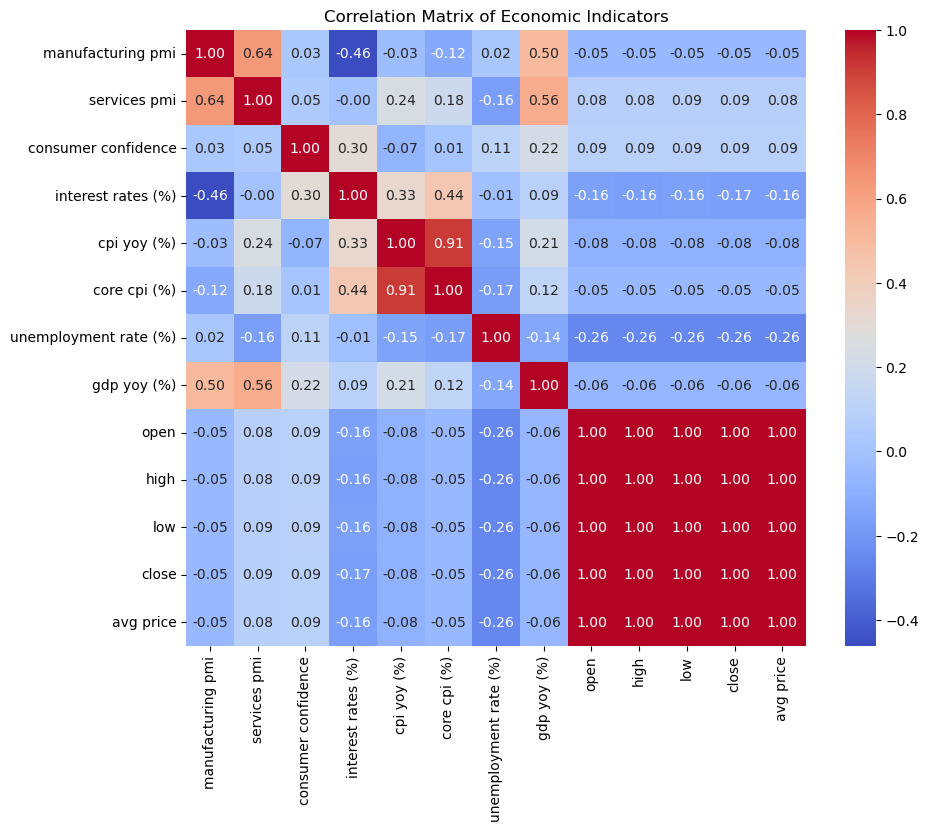

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Economic Indicators')
plt.show()